
**Quantiles divide a dataset into equal-sized intervals.**

For example:

- Median (Q2): The 50th percentile (middle value).\n
- Quartiles (Q1, Q2, Q3): Divide data into 4 parts.\n
- Percentiles: Divide data into 100 parts.\n
- They help understand the distribution and spread of data.\n

[17.25 19.5  21.75]


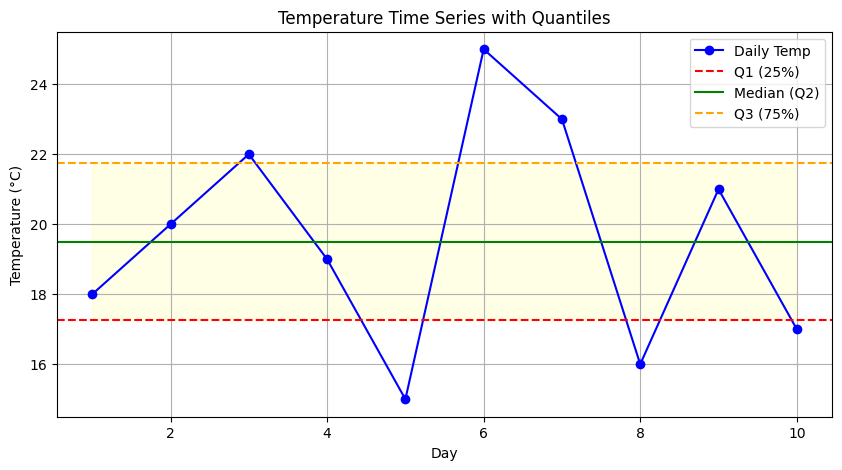

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example time series data
days = np.arange(1, 11)
temps = np.array([18, 20, 22, 19, 15, 25, 23, 16, 21, 17])

# Create DataFrame
df = pd.DataFrame({"Day": days, "Temperature": temps})

# Ensure columns are numeric (convert if needed)
df["Day"] = pd.to_numeric(df["Day"])
df["Temperature"] = pd.to_numeric(df["Temperature"])

# Calculate quantiles (explicitly convert to NumPy array)
quantiles = df["Temperature"].quantile([0.25, 0.5, 0.75]).to_numpy()

print(quantiles)

# Plot
plt.figure(figsize=(10, 5))

# Plot time series (ensure data is 1D)
plt.plot(
    df["Day"].values,  # <-- Explicitly use .values or .to_numpy()
    df["Temperature"].values,
    "bo-",
    label="Daily Temp"
)

# Add quantile lines
plt.axhline(y=quantiles[0], color="r", linestyle="--", label="Q1 (25%)")
plt.axhline(y=quantiles[1], color="g", linestyle="-", label="Median (Q2)")
plt.axhline(y=quantiles[2], color="orange", linestyle="--", label="Q3 (75%)")

# Shade interquartile range (IQR)
plt.fill_between(
    df["Day"].values,  # <-- Explicit conversion
    quantiles[0],
    quantiles[2],
    alpha=0.1,
    color="yellow"
)

plt.title("Temperature Time Series with Quantiles")
plt.xlabel("Day")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid()
plt.show()

**Tasks**

1. **Generate/Sample Time Series Data**
Use the provided synthetic dataset or your own (stock prices, temperature, sales, etc.).

2. **Compute and Plot Quantiles**
Calculate quartiles (Q1, Q2, Q3) and the Interquartile Range (IQR).

Plot the time series with quantile lines.

Highlight the IQR region (between Q1 and Q3).

3. **Detect Outliers**
Identify outliers using the 1.5×IQR rule:

Lower Bound = Q1 – 1.5×IQR

Upper Bound = Q3 + 1.5×IQR

Mark outliers on the plot.

4. **Compare Different Quantiles**
Compute deciles (10%, 20%, ..., 90%) and plot them.

Compare with quartiles—does the distribution change?

5. **Rolling Quantiles (Advanced)**
Compute rolling median (Q2) and rolling IQR over a window (e.g., 7 days).

Plot rolling quantiles to see trends.
"""

In [ ]:
#Sample Time Series Data

import pandas as pd
import numpy as np

# Generate synthetic temperature data (30 days)
np.random.seed(42)
dates = pd.date_range("2023-01-01", periods=30)
temperature = np.random.normal(loc=25, scale=5, size=30).round(1)  # Mean=25°C, Std=5

# Introduce an outlier
temperature[10] = 40  # Unusually hot day

# Create DataFrame
df = pd.DataFrame({"Date": dates, "Temperature": temperature})
print(df.head())

        Date  Temperature
0 2023-01-01         27.5
1 2023-01-02         24.3
2 2023-01-03         28.2
3 2023-01-04         32.6
4 2023-01-05         23.8


        date  Temperature
0 2025-07-01         78.0
1 2025-07-02         64.0
2 2025-07-03         70.0
3 2025-07-04         82.0
4 2025-07-05         90.0
0       (75.0, 78.4]
1       (62.2, 64.0]
2       (67.4, 70.0]
3       (78.4, 90.0]
4       (78.4, 90.0]
5     (33.999, 50.9]
6       (67.4, 70.0]
7       (50.9, 58.0]
8       (58.0, 59.7]
9       (62.2, 64.0]
10      (59.7, 62.2]
11      (70.0, 75.0]
12      (67.4, 70.0]
13      (59.7, 62.2]
14      (62.2, 64.0]
15      (62.2, 64.0]
16      (70.0, 75.0]
17      (50.9, 58.0]
18      (62.2, 64.0]
19      (50.9, 58.0]
20    (33.999, 50.9]
21      (64.0, 67.4]
22      (67.4, 70.0]
23      (50.9, 58.0]
24      (78.4, 90.0]
25    (33.999, 50.9]
26      (59.7, 62.2]
27      (50.9, 58.0]
28      (70.0, 75.0]
29      (70.0, 75.0]
Name: Temperature, dtype: category
Categories (10, interval[float64, right]): [(33.999, 50.9] < (50.9, 58.0] < (58.0, 59.7] <
                                            (59.7, 62.2] ... (67.4, 70.0] < (70.0, 75.0]

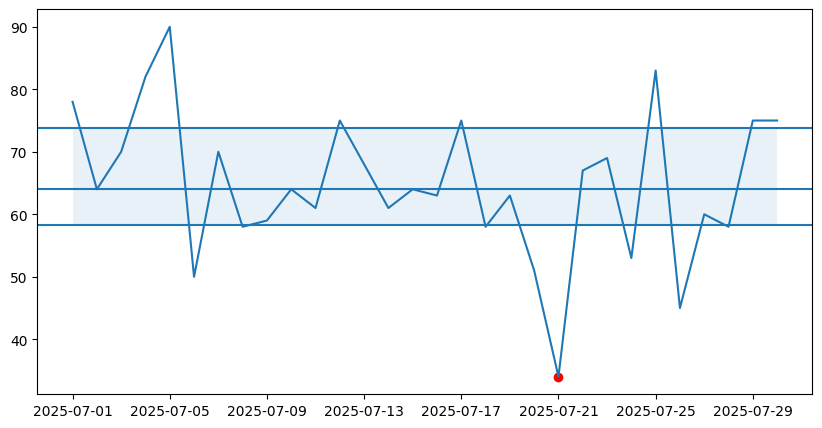

In [29]:
# Your solution to task 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate time series data, 30 points, normally distributed mu=60 sigma=10
np.random.seed(0)
dates = pd.date_range("2025-07-01", periods=30)
temperature = np.random.normal(loc=60, scale=10, size=30).round(0)

#Replace data with an outlier (3 standard deviations)
temperature[4] = 90

df = pd.DataFrame({"date": dates, "Temperature": temperature})
print(df.head())

# Your solution to task 2
quartiles = df["Temperature"].quantile([0.25, 0.5, 0.75]).to_numpy()
iqr = (quartiles[2] - quartiles[0])

plt.figure(figsize = (10, 5))

plt.plot(dates, temperature)

plt.axhline(y= quartiles[0])
plt.axhline(y= quartiles[1])
plt.axhline(y= quartiles[2])

plt.fill_between(x= dates, y1=quartiles[0], y2=quartiles[2], alpha=0.1)

plt.show

# Solution to task 3

outliers = df[(df["Temperature"] < quartiles[0] - 1.5 * iqr)
              | (df["Temperature"] > quartiles[2] + 1.5 * iqr)]
plt.scatter(
    outliers["date"],
    outliers["Temperature"],
    c='red'
    )

# Solution to task 4

deciles = pd.qcut(x = df["Temperature"], q= 10)
print(deciles)

In [ ]:
# Your solution to task 3

In [ ]:
#Bonus Challenge
#Use Seaborn for a boxplot over time: